In [1]:
from itertools import chain
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
from time import time
#from simce.utils import dic_img_preg
import pandas as pd
from matplotlib import cm
import pandas as pd

pd.set_option('display.max_rows', 500)

### Revisión excel

In [2]:
CE_Final_DobleMarca = pd.read_csv('CE_Final_DobleMarca.csv', delimiter=';')
CE_Origen_DobleMarca = pd.read_csv('CE_Origen_DobleMarca.csv', delimiter=';')

In [3]:
nombres_col = CE_Final_DobleMarca.columns.to_list()

nombres_col = pd.DataFrame({'nombres_col': nombres_col,
                            'id': [x.find('p') for x in nombres_col]})

nombres_col = nombres_col[nombres_col['id'] == 0 ][nombres_col['nombres_col']!= 'prueba']

C:\Users\jmpreussa\AppData\Local\Temp\ipykernel_18744\3687603330.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nombres_col = nombres_col[nombres_col['id'] == 0 ][nombres_col['nombres_col']!= 'prueba']


In [4]:
CE_Final_DobleMarca.head()

,codigoForm,nivel,prueba,rbd,dvRbd,letra,codigoCurso,serie,p1,p2_1,...,p29_3,codBarra,rbdCln,hojaAplic,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6
0,CE,40,1,8415,8,A,200,4000082,10,99,...,0,4BCESCEN400008201,00003,1,CE\00200\4000082_1.jpg,CE\00200\4000082_2.jpg,CE\00200\4000082_3.jpg,CE\00200\4000082_4.jpg,CE\00200\4000082_5.jpg,CE\00200\4000082_6.jpg
1,CE,40,1,8368,2,B,324,4000121,10,3,...,1,4BCESCEN400012101,00004,0,CE\00324\4000121_1.jpg,CE\00324\4000121_2.jpg,CE\00324\4000121_3.jpg,CE\00324\4000121_4.jpg,CE\00324\4000121_5.jpg,CE\00324\4000121_6.jpg
2,CE,40,1,0,0,,4,4000123,10,3,...,1,4BCESCEN400012301,00004,0,CE\00324\4000123_1.jpg,CE\00324\4000123_2.jpg,CE\00324\4000123_3.jpg,CE\00324\4000123_4.jpg,CE\00324\4000123_5.jpg,CE\00324\4000123_6.jpg
3,CE,40,1,8413,1,A,199,4000081,0,4,...,1,4BCESCEN400008101,00003,1,CE\00199\4000081_1.jpg,CE\00199\4000081_2.jpg,CE\00199\4000081_3.jpg,CE\00199\4000081_4.jpg,CE\00199\4000081_5.jpg,CE\00199\4000081_6.jpg
4,CE,40,1,0,0,,4,4000122,9,3,...,3,4BCESCEN400012201,00004,0,CE\00324\4000122_1.jpg,CE\00324\4000122_2.jpg,CE\00324\4000122_3.jpg,CE\00324\4000122_4.jpg,CE\00324\4000122_5.jpg,CE\00324\4000122_6.jpg


In [44]:
CE_Final_DobleMarca.sort_values('rbd')

,codigoForm,nivel,prueba,rbd,dvRbd,letra,codigoCurso,serie,p1,p2_1,...,p29_3,codBarra,rbdCln,hojaAplic,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6
2,CE,40,1,0,0,,4,4000123,10,3,...,1,4BCESCEN400012301,00004,0,CE\00324\4000123_1.jpg,CE\00324\4000123_2.jpg,CE\00324\4000123_3.jpg,CE\00324\4000123_4.jpg,CE\00324\4000123_5.jpg,CE\00324\4000123_6.jpg
31398,CE,40,1,0,0,,173,4006882,10,3,...,5,4BCESCEN400688201,00173,0,CE\09449\4006882_1.jpg,CE\09449\4006882_2.jpg,CE\09449\4006882_3.jpg,CE\09449\4006882_4.jpg,CE\09449\4006882_5.jpg,CE\09449\4006882_6.jpg
4,CE,40,1,0,0,,4,4000122,9,3,...,3,4BCESCEN400012201,00004,0,CE\00324\4000122_1.jpg,CE\00324\4000122_2.jpg,CE\00324\4000122_3.jpg,CE\00324\4000122_4.jpg,CE\00324\4000122_5.jpg,CE\00324\4000122_6.jpg
70,CE,40,1,0,0,,77,4003058,0,0,...,0,4BCESCEN400305801,00077,0,CE\00077\4003058_1.jpg,CE\00077\4003058_2.jpg,CE\00077\4003058_3.jpg,CE\00077\4003058_4.jpg,CE\00077\4003058_5.jpg,CE\00077\4003058_6.jpg
126,CE,40,1,0,0,,114,4004523,10,2,...,1,4BCESCEN400452301,00114,0,CE\05789\4004523_1.jpg,CE\05789\4004523_2.jpg,CE\05789\4004523_3.jpg,CE\05789\4004523_4.jpg,CE\05789\4004523_5.jpg,CE\05789\4004523_6.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65464,CE,40,1,42162,6,A,9651,4261305,10,4,...,0,4BCENCEN426130501,42162-09651,1,CE\09651\4261305_1.jpg,CE\09651\4261305_2.jpg,CE\09651\4261305_3.jpg,CE\09651\4261305_4.jpg,CE\09651\4261305_5.jpg,CE\09651\4261305_6.jpg
49884,CE,40,1,42162,6,A,9651,4261309,10,4,...,1,4BCENCEN426130901,42162-09651,1,CE\09651\4261309_1.jpg,CE\09651\4261309_2.jpg,CE\09651\4261309_3.jpg,CE\09651\4261309_4.jpg,CE\09651\4261309_5.jpg,CE\09651\4261309_6.jpg
34842,CE,40,1,42178,2,A,7953,4217150,9,4,...,1,4BCENCEN421715001,42178-07953,1,CE\07953\4217150_1.jpg,CE\07953\4217150_2.jpg,CE\07953\4217150_3.jpg,CE\07953\4217150_4.jpg,CE\07953\4217150_5.jpg,CE\07953\4217150_6.jpg
28668,CE,40,1,42190,1,A,147,4005848,0,4,...,1,4BCESCEN400584801,00147,1,CE\07374\4005848_1.jpg,CE\07374\4005848_2.jpg,CE\07374\4005848_3.jpg,CE\07374\4005848_4.jpg,CE\07374\4005848_5.jpg,CE\07374\4005848_6.jpg


In [43]:
df.sort_values('rbd')

,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
7774630,0,0,173,4006882,CE\09449\4006882_1.jpg,CE\09449\4006882_2.jpg,CE\09449\4006882_3.jpg,CE\09449\4006882_4.jpg,CE\09449\4006882_5.jpg,CE\09449\4006882_6.jpg,p19_5,2
5206783,0,0,144,4005724,CE\08256\4005724_1.jpg,CE\08256\4005724_2.jpg,CE\08256\4005724_3.jpg,CE\08256\4005724_4.jpg,CE\08256\4005724_5.jpg,CE\08256\4005724_6.jpg,p12_1,3
5206784,0,0,144,4005726,CE\08256\4005726_1.jpg,CE\08256\4005726_2.jpg,CE\08256\4005726_3.jpg,CE\08256\4005726_4.jpg,CE\08256\4005726_5.jpg,CE\08256\4005726_6.jpg,p12_1,3
10146374,0,0,77,4003058,CE\00077\4003058_1.jpg,CE\00077\4003058_2.jpg,CE\00077\4003058_3.jpg,CE\00077\4003058_4.jpg,CE\00077\4003058_5.jpg,CE\00077\4003058_6.jpg,p26_2,0
10146430,0,0,114,4004523,CE\05789\4004523_1.jpg,CE\05789\4004523_2.jpg,CE\05789\4004523_3.jpg,CE\05789\4004523_4.jpg,CE\05789\4004523_5.jpg,CE\05789\4004523_6.jpg,p26_2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6236600,42190,1,147,4005846,CE\07374\4005846_1.jpg,CE\07374\4005846_2.jpg,CE\07374\4005846_3.jpg,CE\07374\4005846_4.jpg,CE\07374\4005846_5.jpg,CE\07374\4005846_6.jpg,p15_1,3
3566524,42190,1,147,4005848,CE\07374\4005848_1.jpg,CE\07374\4005848_2.jpg,CE\07374\4005848_3.jpg,CE\07374\4005848_4.jpg,CE\07374\4005848_5.jpg,CE\07374\4005848_6.jpg,p8_6,4
3566520,42190,1,147,4005846,CE\07374\4005846_1.jpg,CE\07374\4005846_2.jpg,CE\07374\4005846_3.jpg,CE\07374\4005846_4.jpg,CE\07374\4005846_5.jpg,CE\07374\4005846_6.jpg,p8_6,2
3232764,42190,1,147,4005848,CE\07374\4005848_1.jpg,CE\07374\4005848_2.jpg,CE\07374\4005848_3.jpg,CE\07374\4005848_4.jpg,CE\07374\4005848_5.jpg,CE\07374\4005848_6.jpg,p8_1,4


In [5]:
CE_Final_DobleMarca[['rbd', 'dvRbd', 'codigoCurso','serie']]  # serie es la unidad mas pequeña que identifica a cada documento

,rbd,dvRbd,codigoCurso,serie
0,8415,8,200,4000082
1,8368,2,324,4000121
2,0,0,4,4000123
3,8413,1,199,4000081
4,0,0,4,4000122
...,...,...,...,...
66747,25454,1,10200,4281143
66748,25454,1,10200,4281150
66749,25454,1,10200,4281152
66750,25454,1,10200,4281159


In [6]:
df_origen = CE_Origen_DobleMarca.melt(id_vars=['rbd', 'dvRbd', 'codigoCurso','serie',
                                       'rutaImagen1', 'rutaImagen2', 'rutaImagen3', 'rutaImagen4', 'rutaImagen5', 'rutaImagen6'], 
                               value_vars= nombres_col['nombres_col'],
                               var_name= 'preguntas',
                               value_name= 'respuestas')

df_origen

,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
0,20219,3,4979,4139392,CE\04979\4139392_1.jpg,CE\04979\4139392_2.jpg,CE\04979\4139392_3.jpg,CE\04979\4139392_4.jpg,CE\04979\4139392_5.jpg,CE\04979\4139392_6.jpg,p1,9
1,20219,3,4979,4139383,CE\04979\4139383_1.jpg,CE\04979\4139383_2.jpg,CE\04979\4139383_3.jpg,CE\04979\4139383_4.jpg,CE\04979\4139383_5.jpg,CE\04979\4139383_6.jpg,p1,9
2,5575,1,5196,4142719,CE\05196\4142719_1.jpg,CE\05196\4142719_2.jpg,CE\05196\4142719_3.jpg,CE\05196\4142719_4.jpg,CE\05196\4142719_5.jpg,CE\05196\4142719_6.jpg,p1,9
3,5575,1,5196,4142734,CE\05196\4142734_1.jpg,CE\05196\4142734_2.jpg,CE\05196\4142734_3.jpg,CE\05196\4142734_4.jpg,CE\05196\4142734_5.jpg,CE\05196\4142734_6.jpg,p1,10
4,5508,5,5148,4142109,CE\05148\4142109_1.jpg,CE\05148\4142109_2.jpg,CE\05148\4142109_3.jpg,CE\05148\4142109_4.jpg,CE\05148\4142109_5.jpg,CE\05148\4142109_6.jpg,p1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
11080827,5315,5,4726,4136239,CE\04726\4136239_1.jpg,CE\04726\4136239_2.jpg,CE\04726\4136239_3.jpg,CE\04726\4136239_4.jpg,CE\04726\4136239_5.jpg,CE\04726\4136239_6.jpg,p29_3,1
11080828,6027,5,4774,4136885,CE\04774\4136885_1.jpg,CE\04774\4136885_2.jpg,CE\04774\4136885_3.jpg,CE\04774\4136885_4.jpg,CE\04774\4136885_5.jpg,CE\04774\4136885_6.jpg,p29_3,1
11080829,6027,5,4774,4136886,CE\04774\4136886_1.jpg,CE\04774\4136886_2.jpg,CE\04774\4136886_3.jpg,CE\04774\4136886_4.jpg,CE\04774\4136886_5.jpg,CE\04774\4136886_6.jpg,p29_3,0
11080830,6029,1,4775,4136892,CE\04775\4136892_1.jpg,CE\04775\4136892_2.jpg,CE\04775\4136892_3.jpg,CE\04775\4136892_4.jpg,CE\04775\4136892_5.jpg,CE\04775\4136892_6.jpg,p29_3,1


In [7]:
# pivot wider
df = CE_Final_DobleMarca.melt(id_vars=['rbd', 'dvRbd', 'codigoCurso','serie',
                                       'rutaImagen1', 'rutaImagen2', 'rutaImagen3', 'rutaImagen4', 'rutaImagen5', 'rutaImagen6'], 
                              value_vars= nombres_col['nombres_col'],
                              var_name= 'preguntas',
                              value_name= 'respuestas')

df


,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
0,8415,8,200,4000082,CE\00200\4000082_1.jpg,CE\00200\4000082_2.jpg,CE\00200\4000082_3.jpg,CE\00200\4000082_4.jpg,CE\00200\4000082_5.jpg,CE\00200\4000082_6.jpg,p1,10
1,8368,2,324,4000121,CE\00324\4000121_1.jpg,CE\00324\4000121_2.jpg,CE\00324\4000121_3.jpg,CE\00324\4000121_4.jpg,CE\00324\4000121_5.jpg,CE\00324\4000121_6.jpg,p1,10
2,0,0,4,4000123,CE\00324\4000123_1.jpg,CE\00324\4000123_2.jpg,CE\00324\4000123_3.jpg,CE\00324\4000123_4.jpg,CE\00324\4000123_5.jpg,CE\00324\4000123_6.jpg,p1,10
3,8413,1,199,4000081,CE\00199\4000081_1.jpg,CE\00199\4000081_2.jpg,CE\00199\4000081_3.jpg,CE\00199\4000081_4.jpg,CE\00199\4000081_5.jpg,CE\00199\4000081_6.jpg,p1,0
4,0,0,4,4000122,CE\00324\4000122_1.jpg,CE\00324\4000122_2.jpg,CE\00324\4000122_3.jpg,CE\00324\4000122_4.jpg,CE\00324\4000122_5.jpg,CE\00324\4000122_6.jpg,p1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
11080827,25454,1,10200,4281143,CE\10200\4281143_1.jpg,CE\10200\4281143_2.jpg,CE\10200\4281143_3.jpg,CE\10200\4281143_4.jpg,CE\10200\4281143_5.jpg,CE\10200\4281143_6.jpg,p29_3,1
11080828,25454,1,10200,4281150,CE\10200\4281150_1.jpg,CE\10200\4281150_2.jpg,CE\10200\4281150_3.jpg,CE\10200\4281150_4.jpg,CE\10200\4281150_5.jpg,CE\10200\4281150_6.jpg,p29_3,1
11080829,25454,1,10200,4281152,CE\10200\4281152_1.jpg,CE\10200\4281152_2.jpg,CE\10200\4281152_3.jpg,CE\10200\4281152_4.jpg,CE\10200\4281152_5.jpg,CE\10200\4281152_6.jpg,p29_3,1
11080830,25454,1,10200,4281159,CE\10200\4281159_1.jpg,CE\10200\4281159_2.jpg,CE\10200\4281159_3.jpg,CE\10200\4281159_4.jpg,CE\10200\4281159_5.jpg,CE\10200\4281159_6.jpg,p29_3,1


In [8]:
casos_99_origen = df_origen[df_origen['respuestas'] == 99]

In [9]:
df[df['preguntas']=='p1']['respuestas'].value_counts()

respuestas
10    34852
9     24289
0      4568
11     2417
12      294
8        58
90       51
1        40
13       34
16       25
99       25
19       14
4         9
20        9
69        7
23        7
7         6
6         4
5         4
14        4
18        4
94        3
15        3
2         3
40        3
3         2
27        2
60        2
70        2
21        1
36        1
34        1
33        1
30        1
89        1
38        1
96        1
22        1
98        1
50        1
Name: count, dtype: int64

In [10]:
casos_99_origen.shape

(198635, 12)

In [19]:
casos_99 = df[df['respuestas'] == 99]

In [20]:
casos_99.shape

(194159, 12)

In [21]:
casos_99.head()

,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
3367,7743,7,1043,4027075,CE\01043\4027075_1.jpg,CE\01043\4027075_2.jpg,CE\01043\4027075_3.jpg,CE\01043\4027075_4.jpg,CE\01043\4027075_5.jpg,CE\01043\4027075_6.jpg,p1,99
5394,24520,8,1517,4040346,CE\01517\4040346_1.jpg,CE\01517\4040346_2.jpg,CE\01517\4040346_3.jpg,CE\01517\4040346_4.jpg,CE\01517\4040346_5.jpg,CE\01517\4040346_6.jpg,p1,99
6825,10429,9,1462,4038030,CE\01462\4038030_1.jpg,CE\01462\4038030_2.jpg,CE\01462\4038030_3.jpg,CE\01462\4038030_4.jpg,CE\01462\4038030_5.jpg,CE\01462\4038030_6.jpg,p1,99
8731,12649,7,2230,4059848,CE\02230\4059848_1.jpg,CE\02230\4059848_2.jpg,CE\02230\4059848_3.jpg,CE\02230\4059848_4.jpg,CE\02230\4059848_5.jpg,CE\02230\4059848_6.jpg,p1,99
8732,12649,7,2230,4059849,CE\02230\4059849_1.jpg,CE\02230\4059849_2.jpg,CE\02230\4059849_3.jpg,CE\02230\4059849_4.jpg,CE\02230\4059849_5.jpg,CE\02230\4059849_6.jpg,p1,99


In [25]:
casos_99 = casos_99[casos_99['preguntas']!= 'p1']
casos_99_origen = casos_99_origen[casos_99_origen['preguntas']!= 'p1']

In [24]:
casos_99

,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
66752,8415,8,200,4000082,CE\00200\4000082_1.jpg,CE\00200\4000082_2.jpg,CE\00200\4000082_3.jpg,CE\00200\4000082_4.jpg,CE\00200\4000082_5.jpg,CE\00200\4000082_6.jpg,p2_1,99
66775,8863,3,45,4001770,CE\00045\4001770_1.jpg,CE\00045\4001770_2.jpg,CE\00045\4001770_3.jpg,CE\00045\4001770_4.jpg,CE\00045\4001770_5.jpg,CE\00045\4001770_6.jpg,p2_1,99
66912,8421,2,205,4007919,CE\00205\4007919_1.jpg,CE\00205\4007919_2.jpg,CE\00205\4007919_3.jpg,CE\00205\4007919_4.jpg,CE\00205\4007919_5.jpg,CE\00205\4007919_6.jpg,p2_1,99
66952,8438,7,221,4008307,CE\00221\4008307_1.jpg,CE\00221\4008307_2.jpg,CE\00221\4008307_3.jpg,CE\00221\4008307_4.jpg,CE\00221\4008307_5.jpg,CE\00221\4008307_6.jpg,p2_1,99
66992,8439,5,224,4008394,CE\00224\4008394_1.jpg,CE\00224\4008394_2.jpg,CE\00224\4008394_3.jpg,CE\00224\4008394_4.jpg,CE\00224\4008394_5.jpg,CE\00224\4008394_6.jpg,p2_1,99
...,...,...,...,...,...,...,...,...,...,...,...,...
11080457,25936,5,10038,4275511,CE\10038\4275511_1.jpg,CE\10038\4275511_2.jpg,CE\10038\4275511_3.jpg,CE\10038\4275511_4.jpg,CE\10038\4275511_5.jpg,CE\10038\4275511_6.jpg,p29_3,99
11080548,10563,5,10079,4276933,CE\10079\4276933_1.jpg,CE\10079\4276933_2.jpg,CE\10079\4276933_3.jpg,CE\10079\4276933_4.jpg,CE\10079\4276933_5.jpg,CE\10079\4276933_6.jpg,p29_3,99
11080655,10621,6,10124,4278437,CE\10124\4278437_1.jpg,CE\10124\4278437_2.jpg,CE\10124\4278437_3.jpg,CE\10124\4278437_4.jpg,CE\10124\4278437_5.jpg,CE\10124\4278437_6.jpg,p29_3,99
11080705,24654,9,10144,4279180,CE\10144\4279180_1.jpg,CE\10144\4279180_2.jpg,CE\10144\4279180_3.jpg,CE\10144\4279180_4.jpg,CE\10144\4279180_5.jpg,CE\10144\4279180_6.jpg,p29_3,99


In [40]:
casos_99.to_csv('CASOS99_FINAL.csv')
casos_99_origen.to_csv('CASOS99_ORIGEN.csv')

In [101]:
preg = casos_99[casos_99['preguntas'] == 'p1']['rutaImagen2'].iloc[2].replace('CE', '')
preg = r'data\input\cuestionario_estudiantes' + preg

img_preg = cv2.imread(str(preg),1)

In [102]:
str(preg)

'data\\input\\cuestionario_estudiantes\\01462\\4038030_2.jpg'

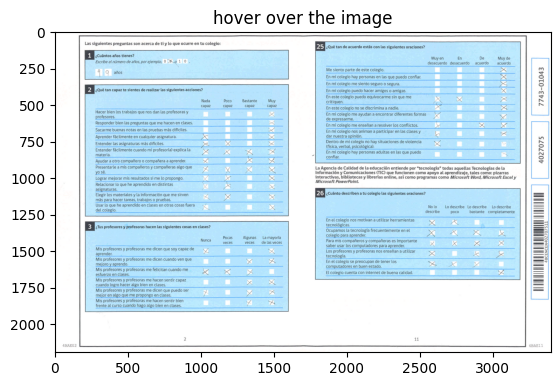

In [96]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(img_preg, cmap=cm.jet)

ax.set_title('hover over the image')

plt.show()

In [26]:
## realizando antijoin
outer_join = casos_99_origen.merge(casos_99, how = 'outer', indicator = True)
anti_join = outer_join[outer_join._merge == 'left_only'].drop('_merge', axis = 1)

anti_join = anti_join.drop_duplicates()  ## revisar algunos casos para ver porque inicialmente fueron detectados como doble marca

In [27]:
anti_join

,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
268,10239,3,1501,4039682,CE\01501\4039682_1.jpg,CE\01501\4039682_2.jpg,CE\01501\4039682_3.jpg,CE\01501\4039682_4.jpg,CE\01501\4039682_5.jpg,CE\01501\4039682_6.jpg,p2_1,99
286,6773,3,2124,4056734,CE\02124\4056734_1.jpg,CE\02124\4056734_2.jpg,CE\02124\4056734_3.jpg,CE\02124\4056734_4.jpg,CE\02124\4056734_5.jpg,CE\02124\4056734_6.jpg,p2_1,99
496,0,0,3,4000082,CE\00200\4000082_1.jpg,CE\00200\4000082_2.jpg,CE\00200\4000082_3.jpg,CE\00200\4000082_4.jpg,CE\00200\4000082_5.jpg,CE\00200\4000082_6.jpg,p2_1,99
503,8863,0,45,4001770,CE\00045\4001770_1.jpg,CE\00045\4001770_2.jpg,CE\00045\4001770_3.jpg,CE\00045\4001770_4.jpg,CE\00045\4001770_5.jpg,CE\00045\4001770_6.jpg,p2_1,99
505,2750,2,170,4006764,CE\09011\4006764_1.jpg,CE\09011\4006764_2.jpg,CE\09011\4006764_3.jpg,CE\09011\4006764_4.jpg,CE\09011\4006764_5.jpg,CE\09011\4006764_6.jpg,p2_1,99
...,...,...,...,...,...,...,...,...,...,...,...,...
198462,1667,5,8148,4223122,CE\08148\4223122_1.jpg,CE\08148\4223122_2.jpg,CE\08148\4223122_3.jpg,CE\08148\4223122_4.jpg,CE\08148\4223122_5.jpg,CE\08148\4223122_6.jpg,p29_3,99
198480,10424,8,1455,4037780,CE\01455\4037780_1.jpg,CE\01455\4037780_2.jpg,CE\01455\4037780_3.jpg,CE\01455\4037780_4.jpg,CE\01455\4037780_5.jpg,CE\01455\4037780_6.jpg,p29_3,99
198504,9598,2,9732,4264227,CE\09732\4264227_1.jpg,CE\09732\4264227_2.jpg,CE\09732\4264227_3.jpg,CE\09732\4264227_4.jpg,CE\09732\4264227_5.jpg,CE\09732\4264227_6.jpg,p29_3,99
198514,13324,8,3540,4103954,CE\03540\4103954_1.jpg,CE\03540\4103954_2.jpg,CE\03540\4103954_3.jpg,CE\03540\4103954_4.jpg,CE\03540\4103954_5.jpg,CE\03540\4103954_6.jpg,p29_3,99


In [39]:
anti_join

rbd
1667     261
125      144
8863      48
9953      41
2750      34
10270     23
9332      19
5878      14
10239     13
303        9
9259       8
10219      8
18123      8
25929      8
3494       7
5813       7
7699       6
11704      6
8415       6
15726      6
9700       5
25669      5
4354       5
40078      5
20016      4
1705       4
9551       4
7749       4
5082       4
9250       4
25223      4
22105      4
1788       4
8368       4
8959       3
20084      3
24884      3
2995       3
7257       3
4947       3
7723       3
8046       3
22083      3
12087      3
367        3
15719      3
15817      3
22086      3
10506      2
4412       2
26044      2
25666      2
10420      2
9741       2
8413       2
10737      2
10106      2
9767       2
25225      2
5101       2
12851      2
25478      2
10157      2
11909      2
10424      2
9922       2
6112       2
40296      2
40102      1
24876      1
8490       1
8613       1
9736       1
13128      1
3445       1
22029      1
2264    

In [36]:
anti_join['preguntas'].value_counts()

preguntas
p8_6      74
p2_3      72
p11_1     70
p2_1      68
p2_6      68
p2_8      62
p2_5      61
p2_2      61
p25_10    60
p6_1      59
p3_1      59
p18_2     55
p26_1     55
p2_4      54
p8_2      54
p27_3     53
p8_1      53
p25_5     52
p4_8      52
p6_5      51
p11_3     51
p18_1     50
p22_1     50
p2_7      50
p3_3      49
p8_5      49
p26_2     48
p6_4      48
p11_4     48
p18_4     47
p2_10     47
p11_7     46
p3_4      43
p3_2      43
p6_3      43
p4_1      42
p2_9      42
p19_2     42
p8_7      42
p4_6      42
p25_1     41
p25_9     41
p4_7      41
p22_4     41
p8_4      40
p6_6      40
p25_7     40
p7_4      38
p25_6     38
p26_3     38
p4_3      37
p2_12     37
p4_4      37
p8_3      36
p14_1     36
p19_6     36
p9_3      36
p12_3     36
p12_1     35
p12_2     35
p6_7      35
p18_3     35
p28_1     35
p26_4     35
p11_2     34
p5_1      34
p27_4     34
p23_1     34
p20_2     34
p8_8      34
p14_2     33
p25_4     33
p4_5      33
p20_1     32
p11_6     32
p27_2     32
p2

In [37]:
## realizando antijoin
outer_join = casos_99.merge(casos_99_origen, how = 'outer', indicator = True)
anti_join = outer_join[outer_join._merge == 'left_only'].drop('_merge', axis = 1)

anti_join = anti_join.drop_duplicates() 

In [38]:
anti_join

,rbd,dvRbd,codigoCurso,serie,rutaImagen1,rutaImagen2,rutaImagen3,rutaImagen4,rutaImagen5,rutaImagen6,preguntas,respuestas
0,8415,8,200,4000082,CE\00200\4000082_1.jpg,CE\00200\4000082_2.jpg,CE\00200\4000082_3.jpg,CE\00200\4000082_4.jpg,CE\00200\4000082_5.jpg,CE\00200\4000082_6.jpg,p2_1,99
1,8863,3,45,4001770,CE\00045\4001770_1.jpg,CE\00045\4001770_2.jpg,CE\00045\4001770_3.jpg,CE\00045\4001770_4.jpg,CE\00045\4001770_5.jpg,CE\00045\4001770_6.jpg,p2_1,99
151,25225,5,1527,4040689,CE\01527\4040689_1.jpg,CE\01527\4040689_2.jpg,CE\01527\4040689_3.jpg,CE\01527\4040689_4.jpg,CE\01527\4040689_5.jpg,CE\01527\4040689_6.jpg,p2_1,99
197,125,2,2306,4062242,CE\02306\4062242_1.jpg,CE\02306\4062242_2.jpg,CE\02306\4062242_3.jpg,CE\02306\4062242_4.jpg,CE\02306\4062242_5.jpg,CE\02306\4062242_6.jpg,p2_1,99
583,2750,2,9011,4006764,CE\09011\4006764_1.jpg,CE\09011\4006764_2.jpg,CE\09011\4006764_3.jpg,CE\09011\4006764_4.jpg,CE\09011\4006764_5.jpg,CE\09011\4006764_6.jpg,p2_1,99
...,...,...,...,...,...,...,...,...,...,...,...,...
193585,9700,4,2784,4001602,CE\02784\4001602_1.jpg,CE\02784\4001602_2.jpg,CE\02784\4001602_3.jpg,CE\02784\4001602_4.jpg,CE\02784\4001602_5.jpg,CE\02784\4001602_6.jpg,p29_3,99
193636,10239,3,1501,4039682,CE\01501\4039682_1.jpg,CE\01501\4039682_2.jpg,CE\01501\4039682_3.jpg,CE\01501\4039682_4.jpg,CE\01501\4039682_5.jpg,CE\01501\4039682_6.jpg,p29_3,99
193675,125,2,2306,4062242,CE\02306\4062242_1.jpg,CE\02306\4062242_2.jpg,CE\02306\4062242_3.jpg,CE\02306\4062242_4.jpg,CE\02306\4062242_5.jpg,CE\02306\4062242_6.jpg,p29_3,99
193968,1667,5,8149,4223122,CE\08148\4223122_1.jpg,CE\08148\4223122_2.jpg,CE\08148\4223122_3.jpg,CE\08148\4223122_4.jpg,CE\08148\4223122_5.jpg,CE\08148\4223122_6.jpg,p29_3,99
